# Coding Your Own Linear Regression Model

<span style="color: #008080">*Aarya Desai*</span>

<span style="color: #008080">*Bárbara Flores*</span>

One task that you will almost certainly be required to do other data science courses (especially if you are a MIDS student) is to write up some of your statistical / machine learning models from scratch. This can be a very valuable exercise, as it ensures that you understand what is actually going on behind the scenes of the models you use ever day, and that you don't just think of them as "black boxes". 

To get a little practice doing this, today you will be coding up your own linear regression model! 

(If you are using this site but aren't actually in this class, you are welcome to skip this exercise if you'd like -- this is more about practicing Python in anticipation of the requirements of other courses than developing your applied data science skills.) 

There are, broadly speaking, two approaches you can take to coding up your own model: 

1. you can write the model by defining a new function, or 
2. you can write the model by defining a new class with associated methods (making a model that works the way a model works in `scikit-learn`). 

Whether you do 1 or 2 is very much a matter of choice and style. Approach one, for example, is more consistent with what is called a *functional* style of programming, while approach two is more consistent with an *object-oriented* style of programming. Python can readily support both approaches, so either would work fine. 

In these exercises, however, I will ask you to use approach number 2 as this *tends* to be the more difficult approach, and so practicing approach 2 will be extra useful in preparing you for other classes (HA! Pun...). In particular, our goal is to implement a linear regression model that has the same "initialize-fit-predict-score" API (application programming interface -- a fancy name for the methods a class supports) as `scikit-learn` models. That means your model should be able to do all of the following:

1. **Initialize** a new model. 
2. **Fit** a linear model when given a numpy vector (`y`) and a numpy matrix (`X`) with the syntax `my_model.fit(X, y)`. 
3. **Predict** values when given a new `numpy` matrix (`X_test`) with the syntax `my_model.predict(X_test)`. 
4. Return the **model coefficients** through the property `my_model.coefficients` (not quite what is used in `sklearn`, but let's use that interface). 

Also, bear in mind that throughout these exercises, we'll be working in `numpy` instead of `pandas`, just as we do in `scikit-learn`. So assume that before using your model, your user has already converted their data from `pandas` into `numpy` arrays. 

**(1)** Define a new Class called `MyLinearModel` with methods for `__init__`, `fit`, `predict`, and an attribute for `coefficients`. For now, we don't need any initialization *arguments*, just an `__init__` function. 

As you get your code outline going, start by just having each method `pass`:

```python
def my_method(self):
    pass
```

This will allow your methods to run without errors (they just don't do anything). Then we can double back to each method to get them working one by one.

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import warnings

pd.set_option("mode.copy_on_write", True)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
class MyLinearModel:
    def __init__(self):
        self.coefficients = None

    def fit(self):
        pass

    def predict(self):
        pass

**(2)** Now define your `fit` method. This is the method that should actually run your linear regression. In case you've forgotten your linear algebra, remember that for linear regressions, $\beta = (X'X)^{-1}X'Y$, a fact you can see explained in detail on page four [here](https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf).

Note that once you have written the code to do a linear regression, you'll need to put your outputs (your coefficents) somewhere. I recommend making an attribute for your class where you can store your coefficients. 

(As a reminder: the normal multiply operator (`*`) in `numpy` implies scalar multiplication. Use `@` for matrix multiplication). 

**HINT:** Remember that linear regressions require a vector of 1s in the `X` matrix. As the package writer, you get to decide whether users are expected to provide a matrix `X` that already has a vector of 1s, or whether you expect the user to provide a matrix `X` that doesn't have a vector of 1s (in which case you will need to add a vector of 1s before you fit the model).

><span style="color: #008080">*In the following code, we modify the fit method to calculate the beta values of our model and store them in the coefficients attribute. It's worth mentioning that in this package, we expect the user to provide a matrix X that doesn't include a vector of 1s. Therefore, we automatically add a vector of 1s before fitting the model.*</span>

In [3]:
class MyLinearModel:
    def __init__(self, y, X):
        self.y = y
        self.X = X
        self.coefficients = None

    def fit(self):
        ones_column = np.ones((self.X.shape[0], 1))
        X_with_ones = np.concatenate((ones_column, self.X), axis=1)
        self.coefficients = (
            np.linalg.inv(X_with_ones.T @
                          X_with_ones) @ (X_with_ones.T) @ self.y
        )

    def predict(self):
        pass

**(3)** As you write code, it is good to test your code as you work. With that in mind, let's create some toy data. First, create a 100 x 2 matrix where each column is normally distributed. Then create a vector `y` that is a linear combination of those two columns **plus** a vector of normally distributed noise **and** a constant term. 

In other words, we want to create data where we *know* exactly what coefficients we should see so when we test our regression, we know if the results are accurate!

><span style="color: #008080">*In the next code, we created a matrix of dimensions 100 x 2, with values drawn from a normal distribution with a mean of 0 and a standard deviation of 1.*</span>
>
><span style="color: #008080">*Next, we introduced a vector of normally distributed noise with a mean of 0 and a standard deviation of 0.5.*</span>
>
><span style="color: #008080">*Finally, we created our target variable y with a constant/intercept of 5, a Beta1 of 3, and a Beta2 of -2, using the matrix and noise vectors in a linear combination*</span>

In [4]:
np.random.seed(42)  # For reproducibility

# Generate a 100 x 2 matrix where each column is normally distributed
X = np.random.normal(size=(100, 2))

# Vector of normally distributed noise with a standard deviation of 0.5 and mean of 0
noise = np.random.normal(scale=0.5, size=100)

# Define the coefficients for the linear combination
constant = 5
coefficient_1 = 3
coefficient_2 = -2

# Create the vector y as a linear combination of the columns of X, noise, and the constant term
y = constant + coefficient_1 * X[:, 0] + coefficient_2 * X[:, 1] + noise

**(4)** Now test whether you `fit` method generates the correct coefficients. Remember the choice you made in Question 2 about whether your package expects the users' `X` matrix to include a vector of 1s when you test!

><span style="color: #008080">*In the following code, we fit our model with our matrices y and X. Given the construction of our model, our matrix X does not include the column of 1s, as our fit method takes care of adding it.*</span>
>
><span style="color: #008080">*Finally, we obtain that the estimation of our coefficients is: Intercept = 4.94, B1 = 3.052, B2 = -2.028. (Recall that our initial values were 5, 3, and -2 for these coefficients, so our model seems to be performing well.)*</span>

In [5]:
test_MyLinearModel = MyLinearModel(y, X)
test_MyLinearModel.fit()
test_MyLinearModel.coefficients

array([ 5.04639669,  3.09536017, -2.08607105])

**(5)** Now let's make the statisticians proud, and in addition to storing the coefficients, let's store the standard errors for our estimated coefficients as another attribute. Recall that the simplest method of calculating the variance covariance matrix for $\beta$ is using the formula $\sigma^2 (X'X)^{-1}$, where $\sigma^2$ is the variance of the error terms of your regression. The standard errors for your coefficient estimates will be the diagonal values of that matrix. See page six [here](https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf) for a full derivation. 

><span style="color: #008080">*In the following code, we add to the fit method of our class, the calculation of the standard error matrix, and we store it in the std_err attribute.*</span>

In [6]:
class MyLinearModel:
    def __init__(self, y, X):
        self.y = y
        self.X = X
        self.coefficients = None
        self.std_err = None

    def fit(self):
        # Calculation of coefficients.
        ones_column = np.ones((self.X.shape[0], 1))
        X_with_ones = np.concatenate((ones_column, self.X), axis=1)
        self.coefficients = (
            np.linalg.inv(X_with_ones.T @
                          X_with_ones) @ (X_with_ones.T) @ self.y
        )

        # Calculation of standard errors.
        y_pred = X_with_ones @ self.coefficients
        variance = np.sum((self.y - y_pred) ** 2) / (len(y) - 1)

        covariance = variance * np.linalg.inv((X_with_ones.T @ X_with_ones))
        self.std_err = np.diag(covariance) ** 0.5

    def predict(self):
        pass

><span style="color: #008080">*Let's see the values we obtain for our toy data.*</span>

In [7]:
test_MyLinearModel = MyLinearModel(y, X)
test_MyLinearModel.fit()
test_MyLinearModel.std_err

array([0.05346841, 0.06217237, 0.05329986])

**(6)** Now let's also add an R-squared attribute to the model.

><span style="color: #008080">*In the following code, we have made modifications to the `MyLinearModel` class. We added the R-squared attribute to the model, calculated the standard error matrix, and stored it in the `std_err` attribute. Additionally, we modified the `fit` method to include the calculation of the R-squared value. After fitting the model and calculating the standard error matrix, you can access the R-squared value using the `r_squared` attribute. To use the updated `MyLinearModel` class, create an instance of it, call the `fit` method, and then access the `std_err` and `r_squared` attributes as needed.*</span>

In [8]:
class MyLinearModel:
    def __init__(self, y, X):
        self.y = y
        self.X = X
        self.coefficients = None
        self.std_err = None
        self.r_squared = None

    def fit(self):
        # Calculation of coefficients.
        ones_column = np.ones((self.X.shape[0], 1))
        X_with_ones = np.concatenate((ones_column, self.X), axis=1)
        self.coefficients = (
            np.linalg.inv(X_with_ones.T @
                          X_with_ones) @ (X_with_ones.T) @ self.y
        )

        # Calculation of standard errors.
        y_pred = X_with_ones @ self.coefficients
        variance = np.sum((self.y - y_pred) ** 2) / (len(self.y) - 1)

        covariance = variance * np.linalg.inv((X_with_ones.T @ X_with_ones))
        self.std_err = np.diag(covariance) ** 0.5

        # Calculation of R-squared.
        ss_total = np.sum((self.y - np.mean(self.y)) ** 2)
        ss_residual = np.sum((self.y - y_pred) ** 2)
        self.r_squared = 1 - (ss_residual / ss_total)

    def predict(self):
        pass

><span style="color: #008080">*Testing with toy data.*</span>

In [9]:
test_MyLinearModel = MyLinearModel(y, X)
test_MyLinearModel.fit()
test_MyLinearModel.r_squared

0.9751732435985402

**(7)** Now we'll go ahead and cheat a little. Use `statsmodels` to fit your model with your toy data to ensure your standard errors and r-squared are correct!

><span style="color: #008080">*To compare our results, we use the statsmodels library. To make the evaluation comparable with our class, we utilize the add_constant() method, which adds the intercept column of ones before fitting the model.*</span>
>
><span style="color: #008080">*When comparing the values obtained by our MyLinearModel class with those obtained by the statsmodels_model, we observe that we obtain the same results for the coefficients Beta, standard errors (std err), and R-squared.*</span>

In [10]:
X_test = sm.add_constant(X)
statsmodels_model = sm.OLS(y, X_test)
statsmodels_model_results = statsmodels_model.fit()

print(statsmodels_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1905.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.42e-78
Time:                        21:10:11   Log-Likelihood:                -77.799
No. Observations:                 100   AIC:                             161.6
Df Residuals:                      97   BIC:                             169.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0464      0.054     93.423      0.0

**(8)** Now implement `predict`! Then test it against your original `X` data -- do you get back something very close to your true `y`?

In [11]:
class MyLinearModel:
    def __init__(self, y, X):
        self.y = y
        self.X = X
        self.coefficients = None
        self.std_err = None
        self.r_squared = None

    def fit(self):
        # Calculation of coefficients.
        ones_column = np.ones((self.X.shape[0], 1))
        X_with_ones = np.concatenate((ones_column, self.X), axis=1)
        self.coefficients = (
            np.linalg.inv(X_with_ones.T @
                          X_with_ones) @ (X_with_ones.T) @ self.y
        )

        # Calculation of standard errors.
        y_pred = X_with_ones @ self.coefficients
        variance = np.sum((self.y - y_pred) ** 2) / (len(self.y) - 1)

        covariance = variance * np.linalg.inv((X_with_ones.T @ X_with_ones))
        self.std_err = np.diag(covariance) ** 0.5

        # Calculation of R-squared.
        ss_total = np.sum((self.y - np.mean(self.y)) ** 2)
        ss_residual = np.sum((self.y - y_pred) ** 2)
        self.r_squared = 1 - (ss_residual / ss_total)

    def predict(self, new_X):
        # Ensure new_X has the ones column added for the intercept
        ones_column = np.ones((new_X.shape[0], 1))
        X_with_ones = np.concatenate((ones_column, new_X), axis=1)
        # Calculation of standard errors.
        y_pred = X_with_ones @ self.coefficients
        return y_pred

><span style="color: #008080">The above code redefines the class `MyLinearModel` that represents a linear regression model. Here, we have added an additional method called `predict` that predicts the target variable `y` using the fitted model. </span>

><span style="color: #008080">To use this class, create an instance of `MyLinearModel` with the target variable `y` and feature matrix `X` (which we have done in the following code chunk). Then, call the `fit` method to fit the model and calculate the coefficients, standard errors, and R-squared value. Finally, you can use the `predict` method to make predictions based on the fitted model.</span>

In [12]:
test_MyLinearModel = MyLinearModel(y, X)
test_MyLinearModel.fit()
predictions = test_MyLinearModel.predict(X)

for true_value, predicted_value in zip(y, predictions):
    print(f"True: {true_value:.2f}\tPredicted: {predicted_value:.2f}")

True: 6.95	Predicted: 6.87
True: 4.18	Predicted: 3.87
True: 5.31	Predicted: 4.81
True: 8.73	Predicted: 8.33
True: 1.82	Predicted: 2.46
True: 4.07	Predicted: 4.58
True: 9.81	Predicted: 9.79
True: 1.21	Predicted: 0.88
True: 1.59	Predicted: 1.26
True: 7.03	Predicted: 5.18
True: 10.13	Predicted: 10.05
True: 8.62	Predicted: 8.23
True: 3.62	Predicted: 3.13
True: 1.12	Predicted: 0.70
True: 3.62	Predicted: 3.80
True: -0.13	Predicted: -0.68
True: 6.69	Predicted: 7.21
True: 9.79	Predicted: 10.14
True: 9.30	Predicted: 9.78
True: 0.66	Predicted: 0.52
True: 8.03	Predicted: 6.97
True: 4.32	Predicted: 5.32
True: 2.35	Predicted: 1.97
True: 0.70	Predicted: 1.42
True: 9.32	Predicted: 9.79
True: 7.29	Predicted: 6.85
True: 1.78	Predicted: 1.68
True: 5.69	Predicted: 6.29
True: 2.74	Predicted: 3.09
True: 4.38	Predicted: 4.04
True: 3.57	Predicted: 3.95
True: 4.18	Predicted: 4.12
True: 4.75	Predicted: 4.73
True: 2.45	Predicted: 2.73
True: 8.45	Predicted: 7.51
True: 3.33	Predicted: 2.96
True: 0.75	Predicted: 1

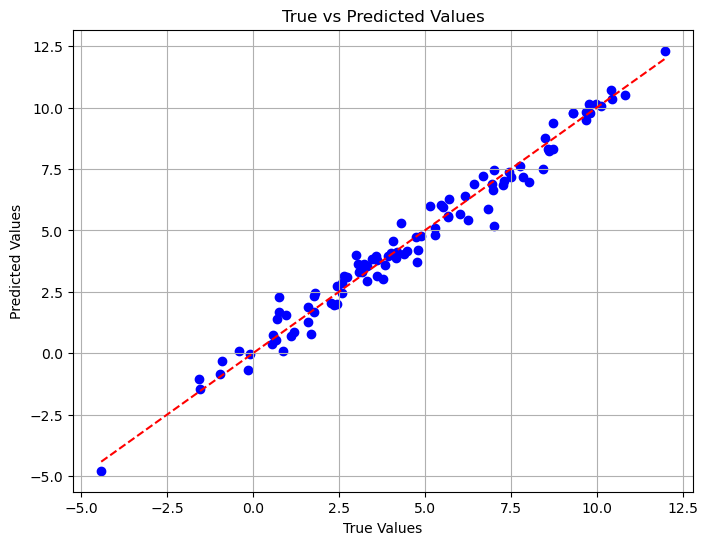

In [17]:
import matplotlib.pyplot as plt

# Plotting true against predicted values from above

plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color="blue")
plt.plot(
    [min(y), max(y)], [min(y), max(y)], color="red", linestyle="--"
)  # Diagonal line for reference
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.grid(True)
plt.show()

><span style="color: #008080"> From the above results, the true vs. predicted numbers presented before the graph, it is difficult to interpret how far apart the true and predicted values are after implementing predict. Thus, to get a better understanding of the same, we plotted the true and predicted values against each other. </span>
>
><span style="color: #008080">The scatter plot illustrates the relationship between true and predicted values of a model. Each point represents a true-predicted pair, and their proximity to the red dashed line signifies the accuracy of predictions. The closer the points align with the diagonal line, the more accurate the model predictions are. In this case, the majority of points cluster near the line, indicating a strong alignment between true and predicted values. This suggests that the model performs well in capturing the underlying patterns in the data and making accurate predictions. </span>

**(9)** Finally, create the *option* of fitting the model with or without a constant term. In other words, create an option so that, if the user passes a numpy array *without* a constant term, your code will add a vector of 1s before fitting the model. As in `scikit-learn`, make this an option you set during initialization. 

In [14]:
class MyLinearModel:
    def __init__(self, y, X, fit_intercept=True):
        self.y = y
        self.X = X
        self.fit_intercept = fit_intercept
        self.coefficients = None
        self.std_err = None
        self.r_squared = None

    def fit(self):
        if self.fit_intercept:
            ones_column = np.ones((self.X.shape[0], 1))
            X_with_ones = np.concatenate((ones_column, self.X), axis=1)
        else:
            X_with_ones = self.X

        self.coefficients = (
            np.linalg.inv(X_with_ones.T @
                          X_with_ones) @ (X_with_ones.T) @ self.y
        )

        y_pred = X_with_ones @ self.coefficients
        variance = np.sum((self.y - y_pred) ** 2) / (len(self.y) - 1)

        covariance = variance * np.linalg.inv((X_with_ones.T @ X_with_ones))
        self.std_err = np.diag(covariance) ** 0.5

        ss_total = np.sum((self.y - np.mean(self.y)) ** 2)
        ss_residual = np.sum((self.y - y_pred) ** 2)
        self.r_squared = 1 - (ss_residual / ss_total)

    def predict(self, new_X):
        if self.fit_intercept:
            ones_column = np.ones((new_X.shape[0], 1))
            X_with_ones = np.concatenate((ones_column, new_X), axis=1)
        else:
            X_with_ones = new_X

        y_pred = X_with_ones @ self.coefficients
        return y_pred

><span style="color: #008080"> In the above code, we have added the option to fit the model with or without a constant term. If the user passes a numpy array without a constant term, the code will add a vector of 1s before fitting the model. </span>
>
><span style="color: #008080">To use this class, we will be using the same test datasets that we have been using thus far. Then, we call the `fit` method to fit the model and calculate the coefficients, standard errors, and R-squared value. However, the additional attribute we will be using when we `.fit()` the model this time will be `fit_intercept = True` and `fit_intercept = False`.</span>

In [21]:
# Fit the model with intercept
model_with_intercept = MyLinearModel(y, X, fit_intercept=True)
model_with_intercept.fit()
predictions_with_intercept = model_with_intercept.predict(X)

# Display coefficients with labels for the model with intercept
feature_names_with_intercept = ["Intercept",
                                "Feature_1", "Feature_2", "Feature_3"]
coefficients_with_intercept = model_with_intercept.coefficients
std_err_with_intercept = model_with_intercept.std_err

print("Coefficients (with intercept):")
for feature_name, coef, std_err in zip(
    feature_names_with_intercept, coefficients_with_intercept, std_err_with_intercept
):
    print(f"{feature_name}: {coef:.2f} (Standard Error: {std_err:.2f})")

# Fit the model without intercept
model_without_intercept = MyLinearModel(y, X, fit_intercept=False)
model_without_intercept.fit()
predictions_without_intercept = model_without_intercept.predict(X)

# Display coefficients with labels for the model without intercept
feature_names_without_intercept = ["Feature_1", "Feature_2", "Feature_3"]
coefficients_without_intercept = model_without_intercept.coefficients
std_err_without_intercept = model_without_intercept.std_err

print("\nCoefficients (without intercept):")
for feature_name, coef, std_err in zip(
    feature_names_without_intercept,
    coefficients_without_intercept,
    std_err_without_intercept,
):
    print(f"{feature_name}: {coef:.2f} (Standard Error: {std_err:.2f})")

Coefficients (with intercept):
Intercept: 5.05 (Standard Error: 0.05)
Feature_1: 3.10 (Standard Error: 0.06)
Feature_2: -2.09 (Standard Error: 0.05)

Coefficients (without intercept):
Feature_1: 2.30 (Standard Error: 0.59)
Feature_2: -1.89 (Standard Error: 0.51)


><span style="color: #008080"> As seen from the above results, this additional attribute of `fit_intercept` is working well and we now have the option to fit the model with or without a constant term! </span>